# Exercises

1. What are the main motivations for reducing a dataset's dimensionality? What are the main drawbacks?
2. What is the curse of dimensionality?
3. Once a dataset's dimensionality has been reduced, is it possible to reverse the operation? If so, how? If not, why?
4. Can PCA be used to reduce the dimensionality of a highly nonlinear dataset?
5. Suppose you perform PCA on a 1,000-dimensional dataset, setting the explained variance ratio to 95%. How many dimensions will the resulting dataset have?
6. In what cases would you use vanilla PCA, incremental PCA, randomised PCA, or kernel PCA?
7. How can you evaluate the performance of a dimensionality reduction algorithm on your dataset?
8. Does it make any sense to chain two different dimensionality reduction algorithms?
9. Load the MNIST dataset & split it into a training set & a test set (take the first 60,000 instances for training, & the remaining 10,000 for testing). Train a random forest classifier on the dataset & time how long it takes, then evaluate the resulting model on the test set. Next, use PCA to reduce the dataset's dimensionality, with an explained variance ratio of 95%. Train a new random forest classifier on the reduced dataset & see how long it takes. Was training much faster? Next, evaluate the classifier on the test set: how does it compare to the previous classifier?
10. Use t-SNE to reduce the MNIST dataset down to two dimensions & plot the results using matplotlib. You can use a scatterplot using 10 different colors to represent each image's target class. alternatively, you can write colored digits at the location of each instance, or even plot a scaled-down versions of the digit images themselves (if you plot all the digits, the visualisation will be too clusttered, so you should either draw a random sample or plot an instance only if no other instance has already been plotted at a close distance). You should get a nice visualisation with well-separated clusters of digits. Try using other dimensionality reduction algorithms such as PCA, LLE, or MDS & compare the resulting visualisations.

---

1. The main benefit of reducing a dataset's dimensionality is that it significantly speeds up training, but it makes the data easier for us to visualise. By reducing the dimensionality, you are guaranteed to lose some information. It also makes your pipelines more complex & harder to maintain. Also, while reducing the dimensionality could potentially filter out noise & unnecessary details, thus resulting in a higher performance, it could also not & just speed up training.
2. The curse of dimensionality is a phenomena that you see with high-dimensional datasets. There is plenty of space in high dimensions, so high-dimensional datasets tend to be very sparse; most training instances are far away from one another. This also means that new instances that we want to predict on are also far away from the training instances, making predictions less reliable than in lower dimensions, since they will be based on much larger extrapolations. Our model is also more likely to overfit the training set, because or model will be more complex & less generalizable.
3. Once a dataset's dimensionality is reduced, it isn't possible to reverse the operation entirely, because it's already lost information. You can only reverse the operation up to a certain point & the result is a dataset that is similar, but not the same, to the original dataset. This is reconstruction. You can get a measure of the difference between the reconstructed dataset & the original dataset with the reconstruction error.
4. Of course PCA can be used, though it will depend on the shape of the dataset. If the training instances lie close to a lower-dimensional subspace of our higher-dimensional dataset, then PCA will perform well compressing the dataset. However, if the shape of the dataset can be modeled with a manifold, then a manifold learning algorithm, like LLE, will perform better than our PCA projection. Using a manifold learning algorithm assumes that a lower-dimensional manifold is part of the higher dimensional data & the manifold resembles a hyperplane. It also assumes that the training instances lie close to the lower-dimensional manifold. Regardless of the algorithm used, it just depends on the shape of the data. Dimensionality reduction might not even help, depending on the end goal. It all just depends.
5. It depends on the proportion of the variance each principal component explains. Whatever number of principal components where the summed proportion of variances is greater or equal to 95% is the number of dimensions the resulting dataset will have.
6. Vanilla PCA is for for dataset compression. It reduces the nubmer of dimensions while trying to preserve as much infromation as possible. Randomised PCA is an approximation of the first *d* principal components (the first principal component always contains the most information (variability), then the second, then the third, & so on. You choose *d*.), so its faster than vanilla PCA. It is automatically used if the number of instances or features is greater than 500 & *d* is less than 80% of the number of instances or features. Basically, randomised PCA is used when the training set is large. Incremental PCA doesn't require that the whole training set be fit into memory for the algorithm to run, unlike the aforementioned PCA methods. The training set is split into mini-batches & fed to the algorithm one mini-batch at a time, making this particularly useful for large training sets & online training. Kernel PCA uses the kernel trick to reduce the dimensionality of a very high-dimensional feature space.
7. You can look at how much the data is compressed. Take the number of dimensions (features) in your original training set & take the number of dimensions in your compressed data set. Put the former over the latter.
8. It could. Maybe you use PCA first to reduce a dataset into 4 principal components, & within those 4 principle components exists a manifold. Then you would want to use manifold learning. Though I think it would highly depend on your dataset.

# 9.

In [1]:
from sklearn.datasets import fetch_openml
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler

mnist = fetch_openml("mnist_784", version = 1, as_frame = False, parser = "auto")
mnist.keys()
X, y = mnist["data"].astype(np.intc), mnist["target"].astype(np.intc)

strat_split = StratifiedShuffleSplit(n_splits = 1, test_size = 10000, random_state = 32)
for train_index, test_index in strat_split.split(X, y):
    X_train, y_train = X[train_index], y[train_index]
    X_test, y_test = X[test_index], y[test_index]

In [2]:
from sklearn.ensemble import RandomForestClassifier
import time

forest_classifier = RandomForestClassifier()
start = time.time()
forest_classifier.fit(X_train, y_train)
end = time.time()
print(end - start)

26.31689763069153


It took about 26 seconds to train our random forest classifier.

In [3]:
from sklearn.metrics import accuracy_score

y_pred = forest_classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.9685

In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 0.95)
X_train_PC = pca.fit_transform(X_train)
len(pca.explained_variance_ratio_)

154

We still keep over 95% of the information in our training set when we reduce it from 784 to 154 dimensions.

In [5]:
start = time.time()
forest_classifier.fit(X_train_PC, y_train)
end = time.time()
print(end - start)

81.75336194038391


Wtf, it took longer.

In [6]:
X_test_PC = pca.transform(X_test)
y_pred = forest_classifier.predict(X_test_PC)
accuracy_score(y_test, y_pred)

0.9492

Performed worse as well. Seems like dimensionality reduction for this dataset did not speed up training nor increase performance.

# 10.

In [1]:
from sklearn.datasets import fetch_openml
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler

mnist = fetch_openml("mnist_784", version = 1, as_frame = False, parser = "auto")
mnist.keys()
X, y = mnist["data"].astype(np.intc), mnist["target"].astype(np.intc)

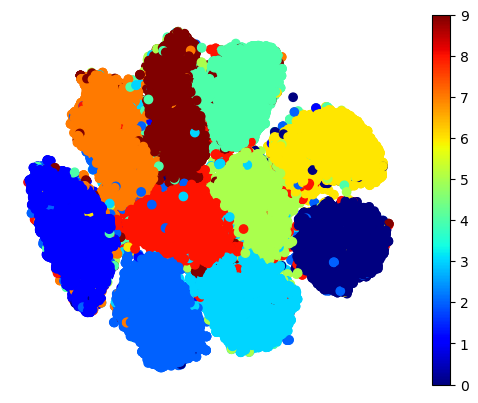

In [2]:
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt

tsne = TSNE(n_components = 2, random_state = 32, n_jobs = 7)
X_tsne = tsne.fit_transform(X)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c = y, cmap = "jet")
plt.colorbar()
plt.axis("off")
plt.show()

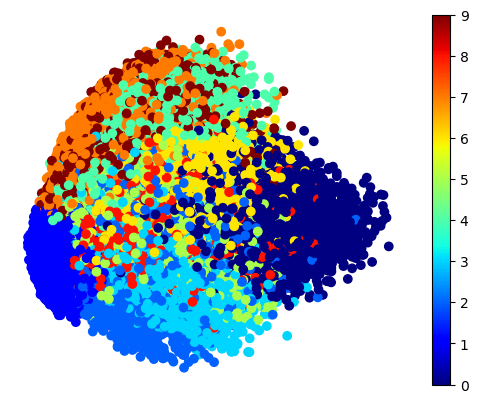

In [3]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2, random_state = 32)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c = y, cmap = "jet")
plt.colorbar()
plt.axis("off")
plt.show()

LLE takes too long. MDS takes up too much memory.